Name: Kemal Berk Kocabagli

I hereby declare that I observed the honour code of the university when preparing the homework.

In [73]:
from IPython.display import Image
from IPython.display import display, Latex

## Solution to 16.3-5 and 18

### Q16 : Time Series Modeling

In the following figures, observations $y_t$ from two processes are given as a function of time index $t$. Observations are known to be discrete with $y_t ∈ \{1, . . . , 30\}$. For each realisation, define a plausible process that would generate similar realisations. Define the appropriate latent variables (if you use any), draw the graphical model and provide the conditional probability tables and/or state transition diagrams.

### 16.3 :

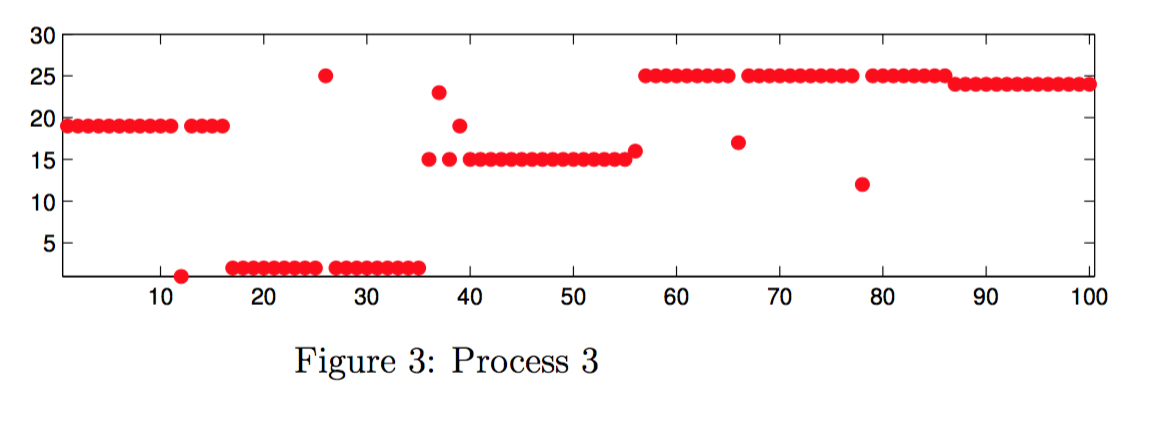

In [74]:
Image("q16.3.png", width=500)

With probability $p >> 1-p$, the observation stays constant. Otherwise, it jumps to some other place in the range $[0,30]$. The jumps seem to be uniformly random.

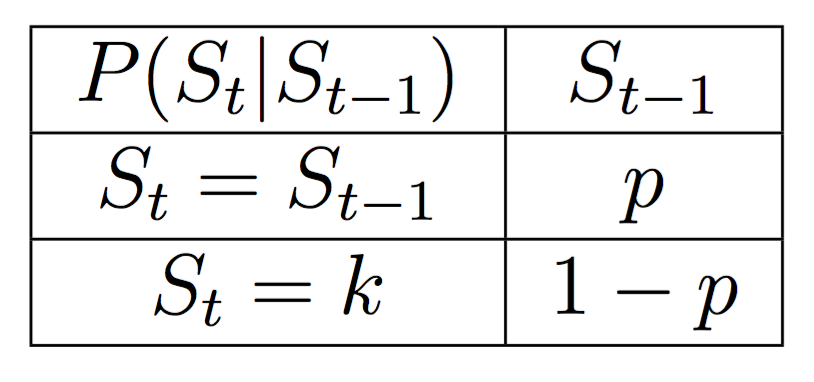

In [75]:
Image("q16.3_i.png", width=240)

where $k \sim \mathcal{U}(0,30)$

To account for the noise, we should also add that only with probability $q >> 1-q$ the model behaves as expected. The rest of the time, random observations occur.

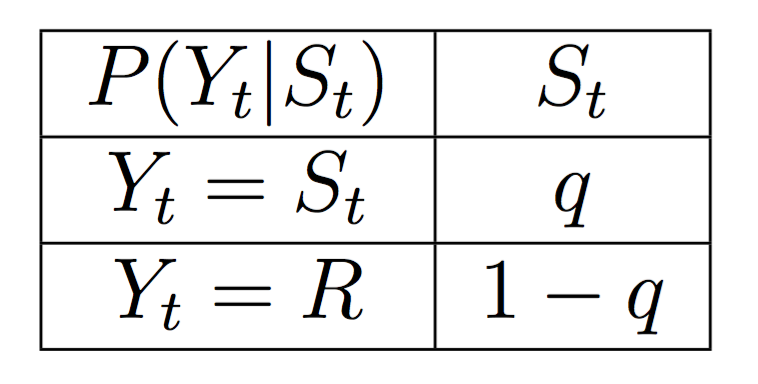

In [76]:
Image("q16.3_ii.png", width=240)

where $R \sim \mathcal{N}(15,7)$ because the noises are generally around 15 and more or less in the range $[8,22]$.

### 16.4 : 
$abcdeabcaabcdeeeeabcababcdabc$

Figure 4: Process 4.    $x_t ∈ \{a, b, c, d, e\}$

Using Laplace correction, I added one pseudo-count to every empirical probability to come up with the following joint probability distribution table (the reason is that since our sample set is small, it is wrong to declare that if we did not see a particular sequence, it's probability should be zero):

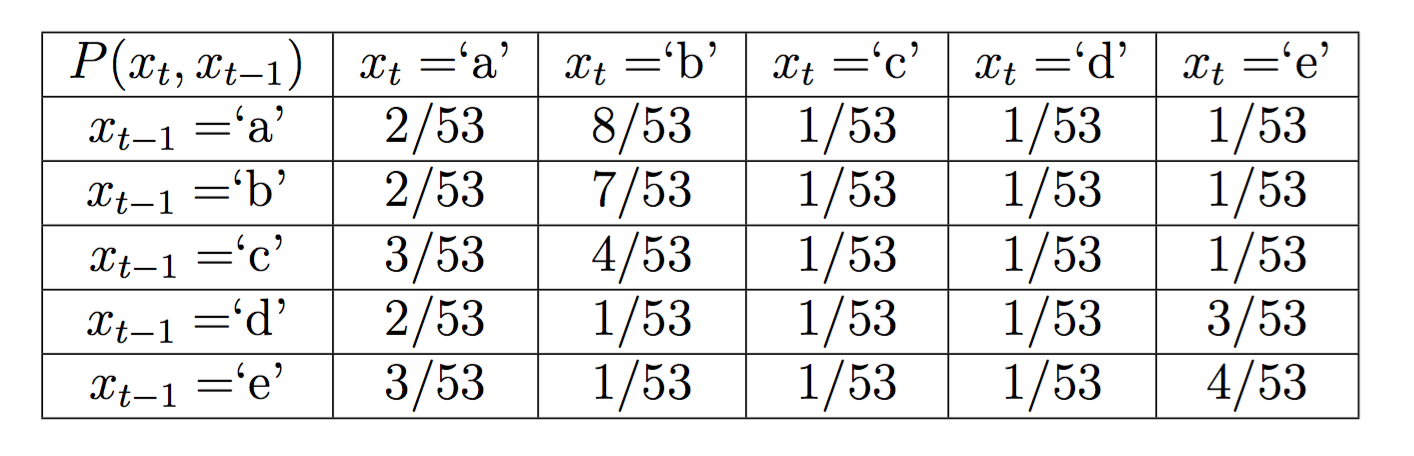

In [77]:
Image("q16.4.png", width=600)

From the table above, $P(x_t|x_{t-1})=\dfrac{P(x_t,x_{t-1})}{P(x_{t-1})}$ can be easily calculated, where $P(x_{t-1})$ is the row-wise sums of the joint table.

As for the graphical model, we can use Markov(1), where each letter affects the immediately proceeding one.

### 16.5 : 
$1110001111000111100001110001111000011110001111$

Figure 5: Process 5. $x_t ∈ {1, 0}$

Applying the same formulation in Q16.4, I derived the following joint distribution table:

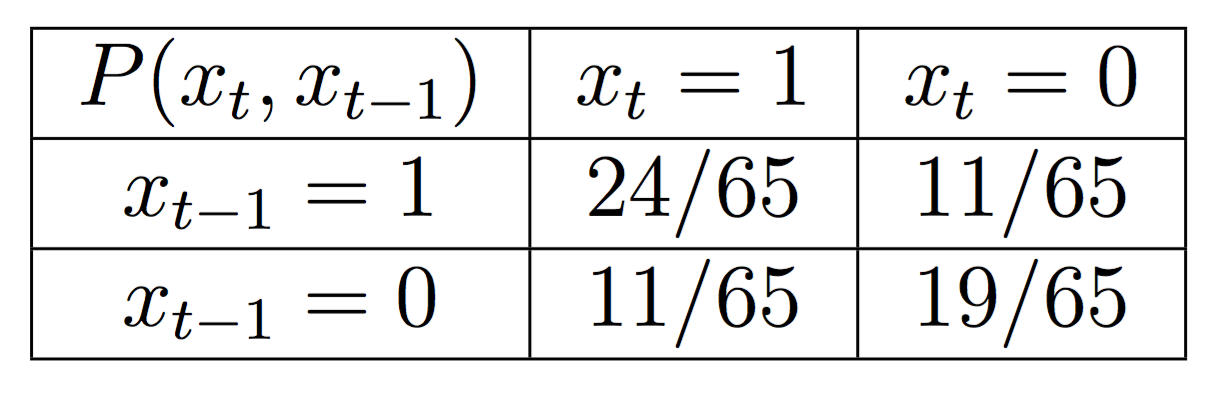

In [78]:
Image("q16.5.png", width=400)

This time, though, to smooth out the data more, I added 1/9 of the original data size (5) to each joint probability and normalized the probabilities. Therefore, the denominator increased by $4*5=20$ and each nominator increased by $5$. 

$P(x_t|x_{t-1})$ can be calculated the same way as in Q16.4 and Markov(1) can be used as a graphical model.

### Q18 : Chest Clinic

In [79]:
print("A distribution factorises according to the following factorisation:")
display(Latex(r"$p(A,B,D,F,T,L,M,X) = p(F|T,L)p(M)p(T|A)p(B|M)p(X|F)p(L|M)p(D|F,B)p(A)$"))

A distribution factorises according to the following factorisation:


<IPython.core.display.Latex object>

#### 1. Draw the corresponding directed graphical model (DAG).

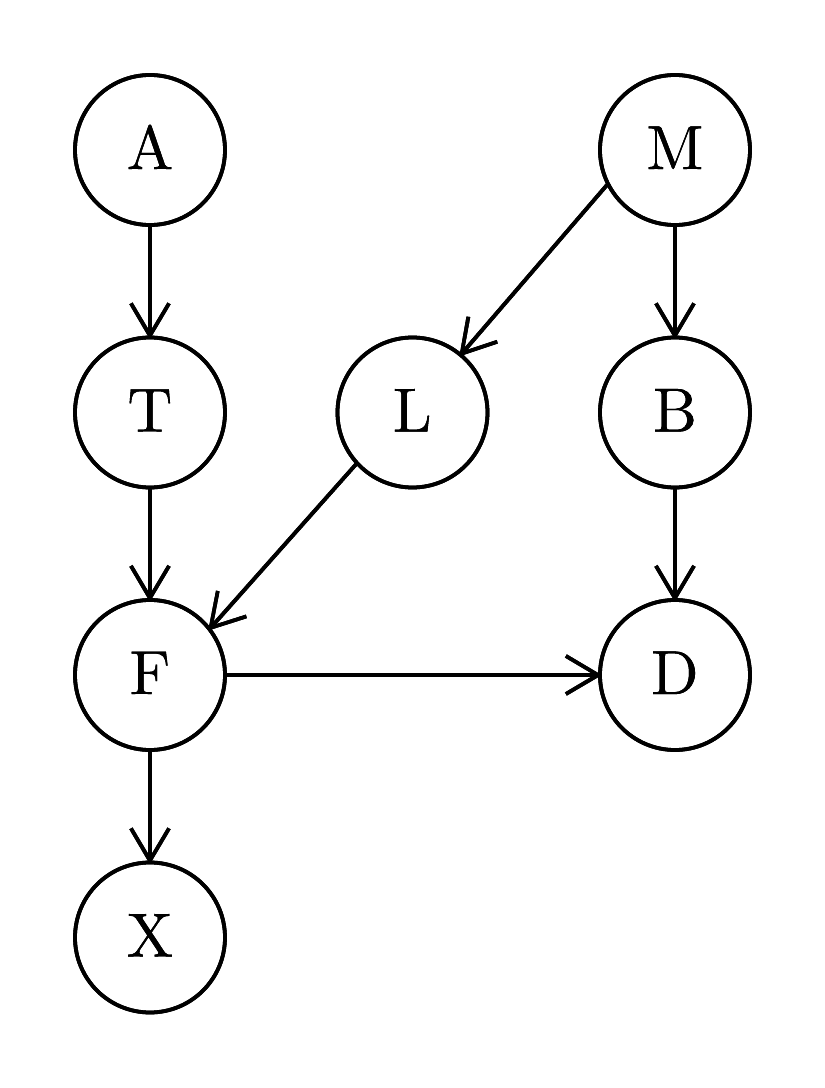

In [80]:
Image("Q18_1.png", width=240)

#### 2. Draw an equivalent factor graph and undirected graphical model.

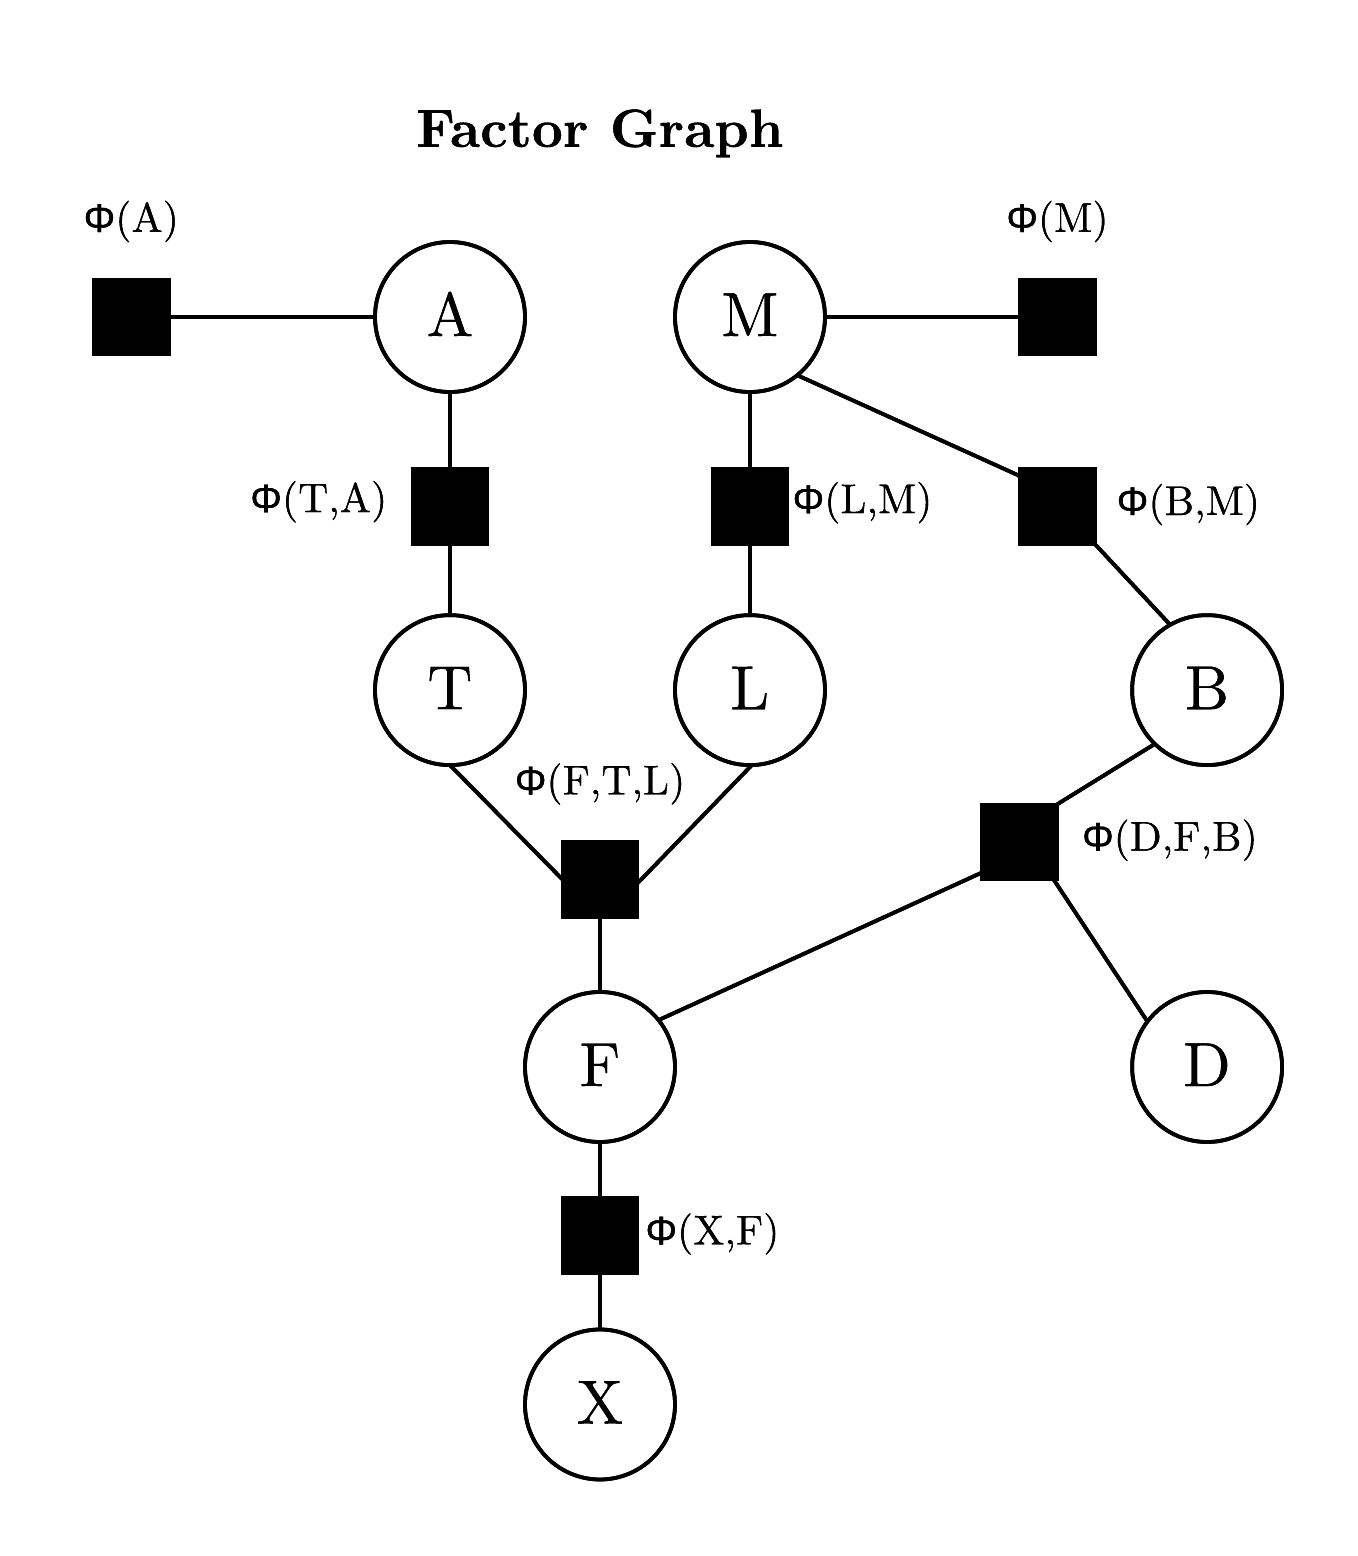

In [81]:
Image("Q18_2_i.png", width=400)

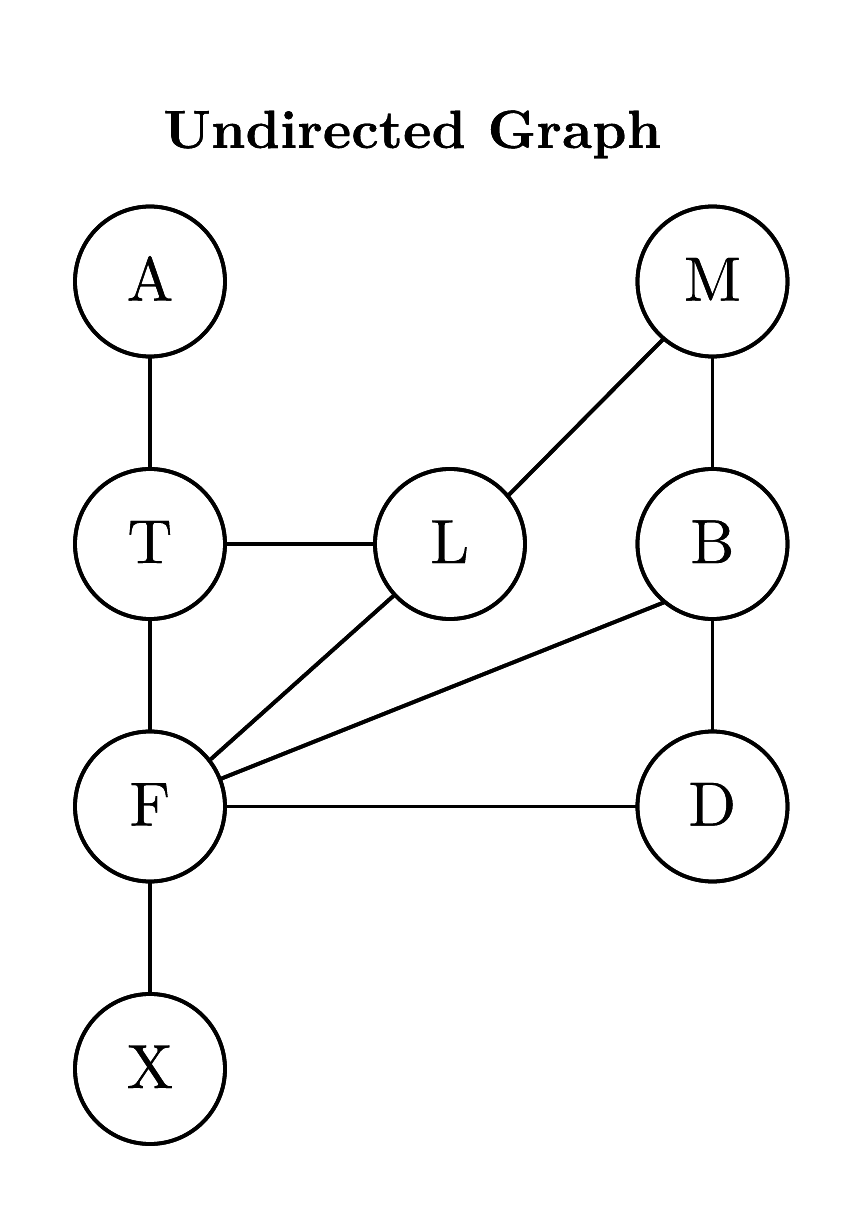

In [82]:
Image("Q18_2_ii.png", width=240)

#### 3. If all the variables have $N$ states, compute the space to store the model specification.

In [83]:
display(Latex(r"$p(F | T,L) \rightarrow (N-1)*N^2$ free variables"))
display(Latex(r"$p(M) \rightarrow (N-1)$ free variables"))
display(Latex(r"$p(T | A) \rightarrow (N-1)*N$ free variables"))
display(Latex(r"$p(B | M) \rightarrow (N-1)*N$ free variables"))
display(Latex(r"$p(X | F) \rightarrow (N-1)*N$ free variables"))
display(Latex(r"$p(L | M) \rightarrow (N-1)*N$ free variables"))
display(Latex(r"$p(D | F,B) \rightarrow (N-1)*N^2$ free variables"))
display(Latex(r"$p(A) \rightarrow (N-1)$ free variables"))
display(Latex(r"Total number of free variables = $2N^2*(N-1) + 4N*(N-1) + 2(N-1)$"))
display(Latex(r"$= 2*(N-1)*(N^2+2N+1)$"))
display(Latex(r"$= 2*(N-1)*(N+1)^2$"))



<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

#### 4. Verify the following conditional independence statements using d-separation. State if they are true or false and explain why.

Define the evidence set $E$ as the set that includes the given variables. The variables in set $E$ will be grey in color in the diagrams.

### a) $A ⊥ M|∅$ = $\textbf{true}$

**Proof:**
2 possible paths exist from $A$ to $M$:

- $A \rightarrow T \rightarrow F \rightarrow L \rightarrow M$ (Case 1)
- $A \rightarrow T \rightarrow F \rightarrow D \rightarrow B \rightarrow M$ (Case 2)

If we show that all possible paths are d-separated given the empty set, it suffices to prove that $A$ is conditionally independent from $M$.

**Case 1:**

$A$ and $M$ are d-separated by node $F$ because
- both edges meet head-to-head at $F$
- neither $F$ nor any of its descendants are in the evidence (given) set $E = \{\}$.

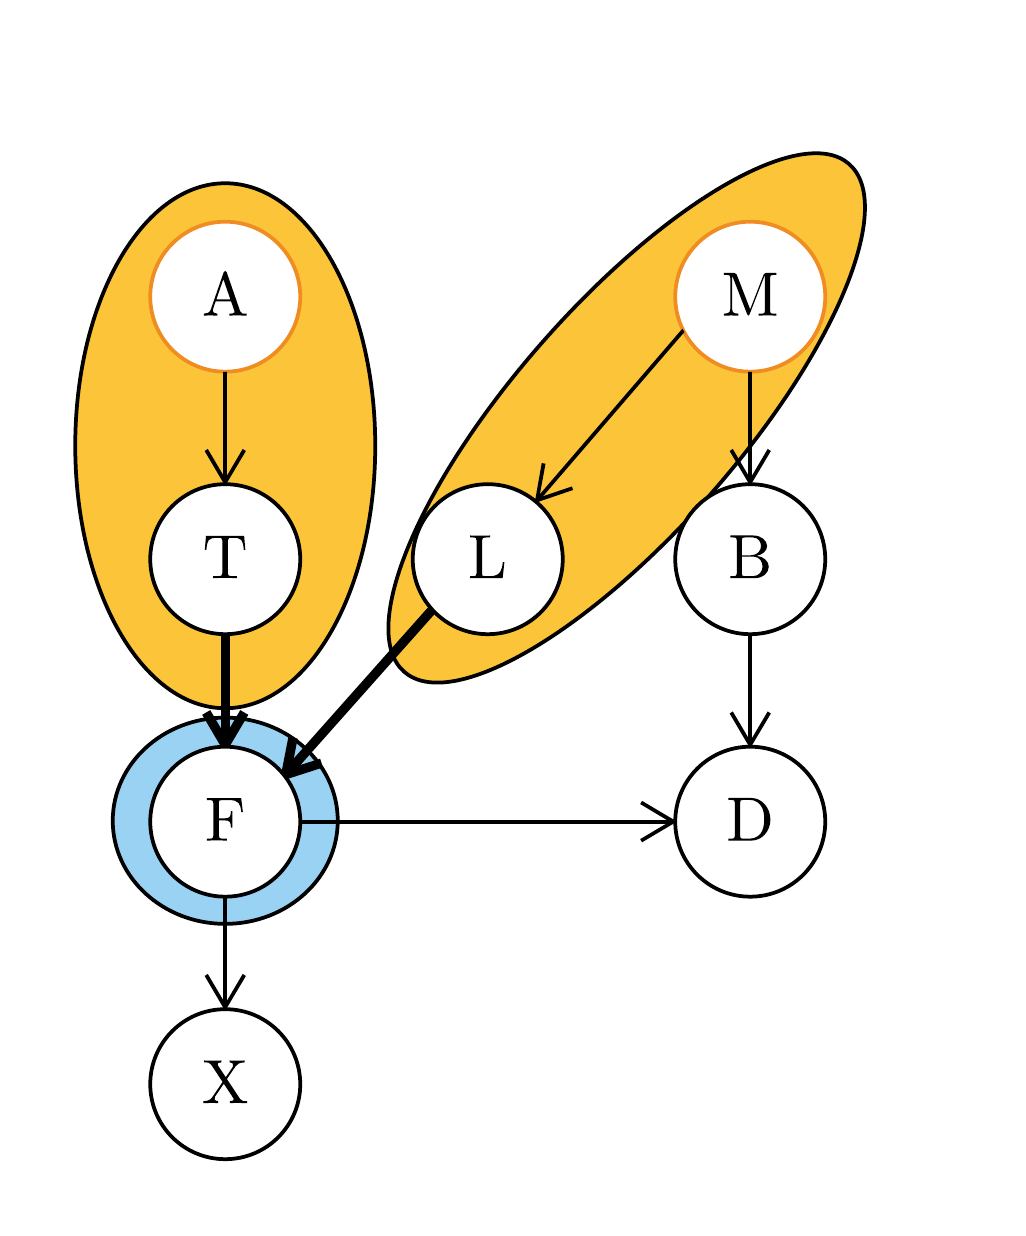

In [84]:
Image("Q18_4_a_i.png", width=240)

**Case 2:**

$A$ and $M$ are d-separated by node $D$ because
- both edges meet head-to-head at $D$
- neither $D$ nor any of its descendants are in the evidence (given) set $E = \{\}$.

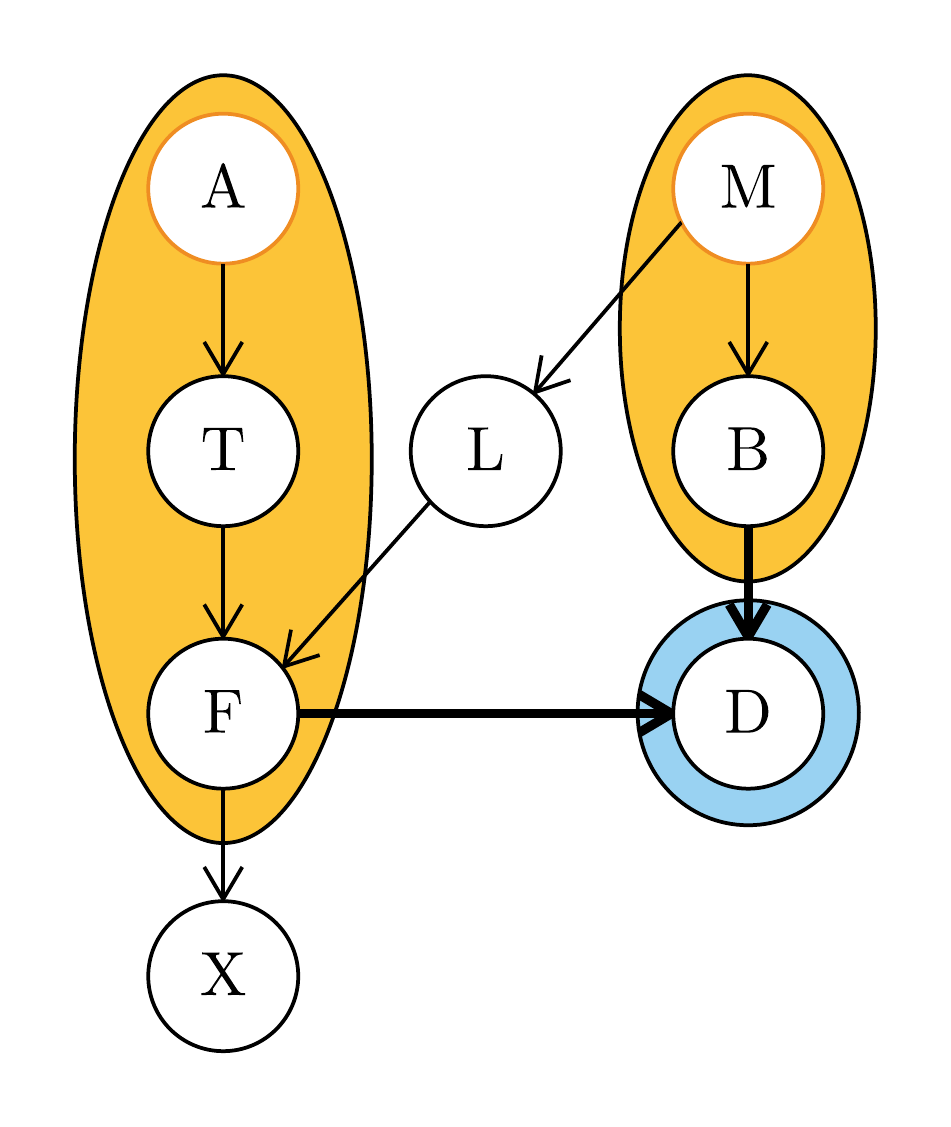

In [85]:
Image("Q18_4_a_ii.png", width=240)

### b) $A ⊥ M|X$ = $\textbf{false}$

**Proof:**

It is sufficient to show one path from $A$ to $M$ that is **not d-separated** to prove that they are not conditionally independent given $X$.

An example for such a path is:
$A \rightarrow T \rightarrow F \rightarrow L \rightarrow M$

Since $X$, a descendant of $F$, is in set $E = \{X\}$, and both edges meet head-to-head at $F$, $F$ is not blocking.

Therefore, the path is not d-separated.


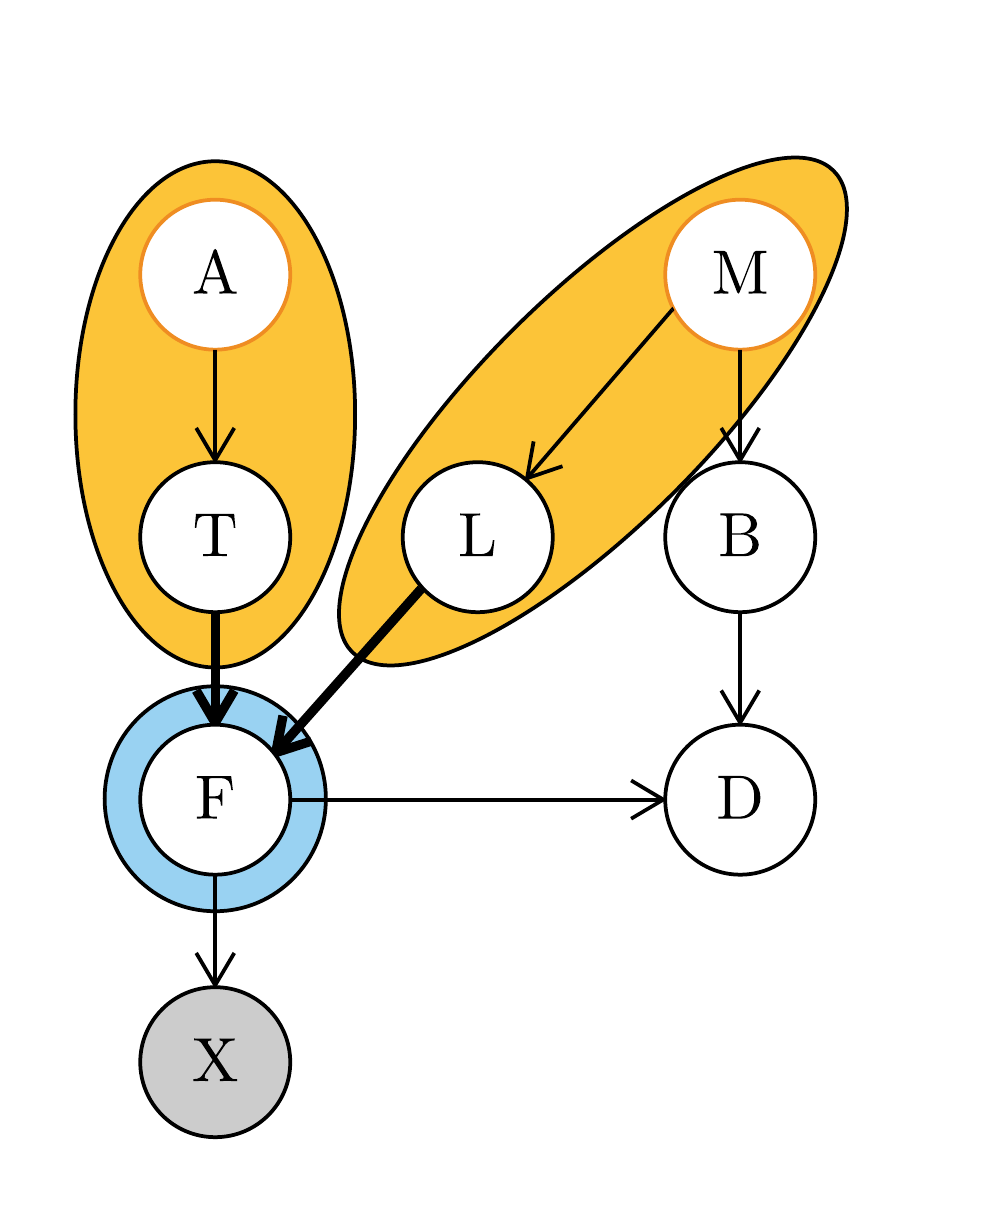

In [86]:
Image("Q18_4_b.png", width=240)

### c) $T ⊥ L|X$ = $\textbf{false}$

**Proof:**

It is sufficient to show one path from $T$ to $L$ that is **not d-separated** to prove that they are not conditionally independent given $X$.

An example for such a path is:
$T \rightarrow F \rightarrow L$

Since $X$, a descendant of $F$, is in set $E = \{X\}$, and both edges meet head-to-head at $F$, $F$ is not blocking.

Therefore, the path is not d-separated.


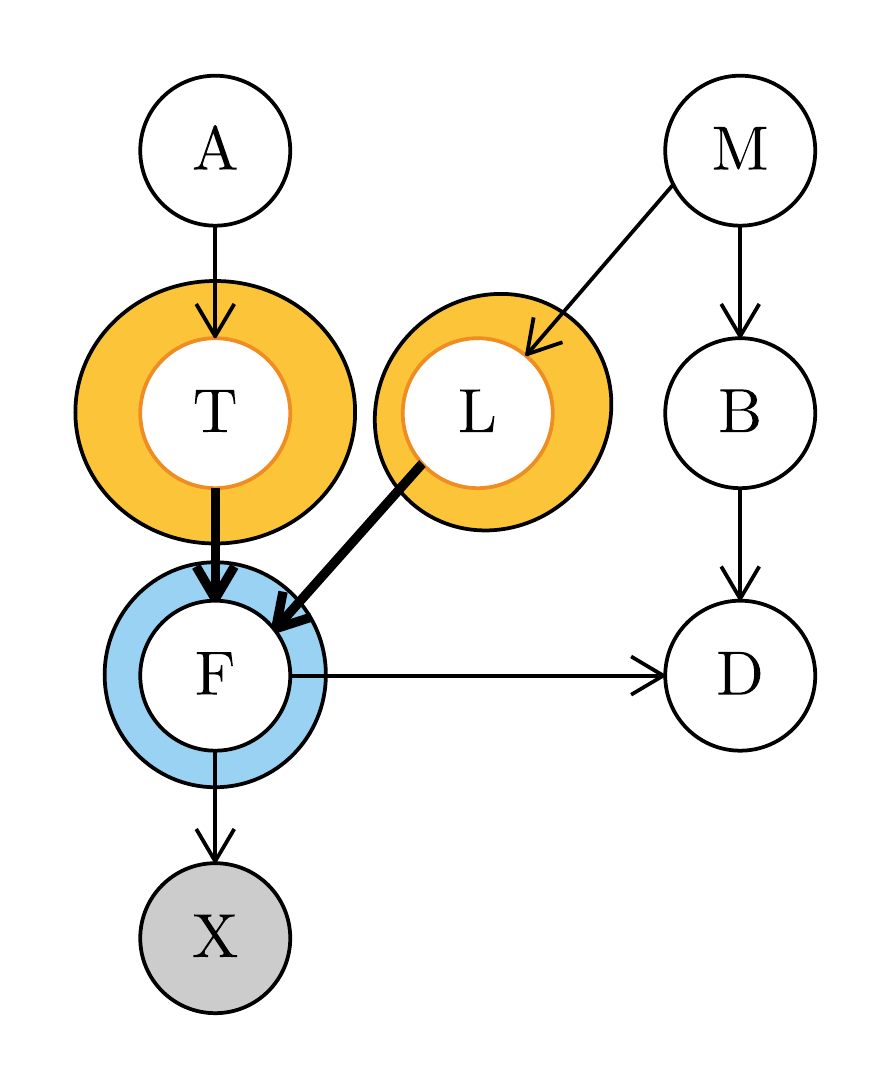

In [87]:
Image("Q18_4_c.png", width=240)

### d) $X ⊥ L|F$ = $\textbf{true}$

**Proof:**
1 possible path exists from $L$ to $X$:

- $L \rightarrow F \rightarrow X$ (Case 1)

If we show that all possible paths are d-separated given set $E$, it suffices to prove that $X$ is conditionally independent from $L$.

**Case 1:**

$L$ and $X$ are d-separated by node $F$ because
- the edges meet head-to-tail at $F$
- $F$ is in the evidence (given) set $E = \{F\}$.

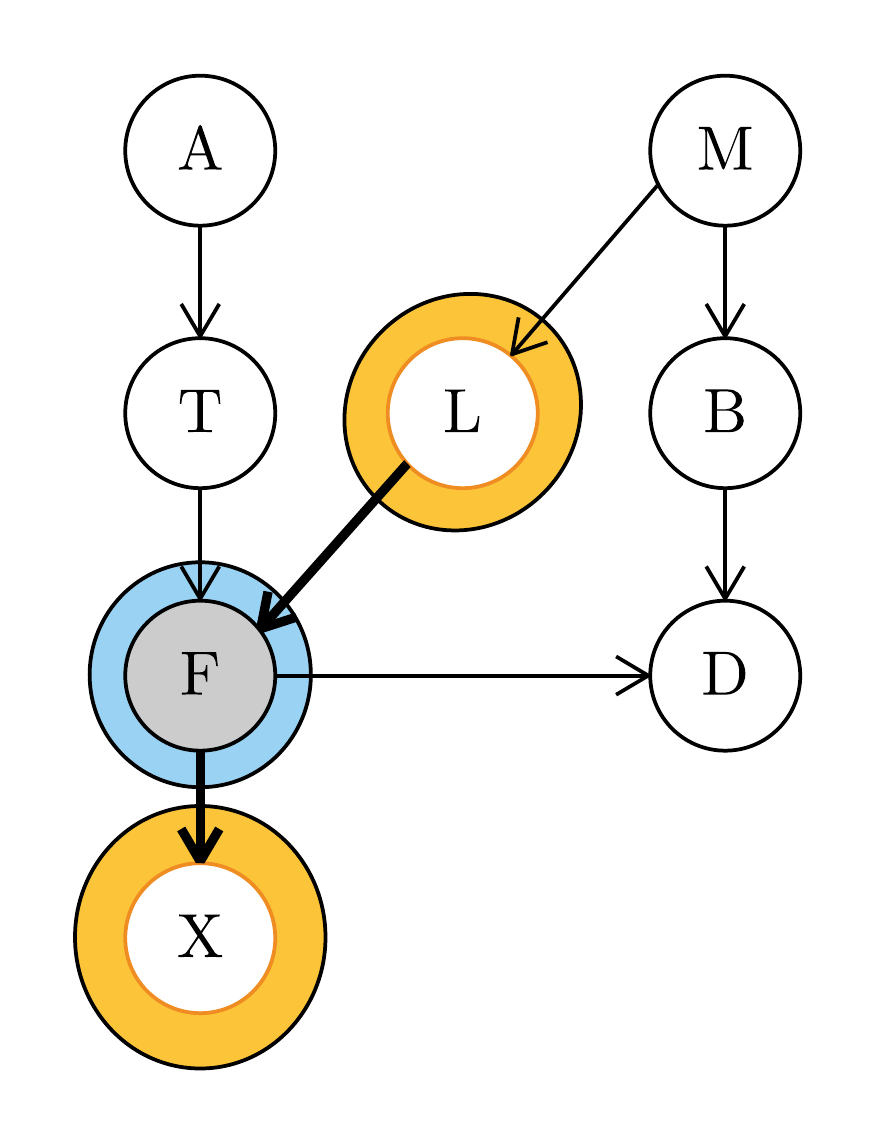

In [88]:
Image("Q18_4_d.png", width=240)

### e) $X ⊥ L|D$ = $\textbf{false}$

**Proof:**

It is sufficient to show one path from $L$ to $X$ that is **not d-separated** to prove that they are not conditionally independent given $D$.

An example for such a path is:
$L \rightarrow F \rightarrow X$

Since $F$ is not in set $E = \{D\}$, and the edges meet head-to-tail at $F$, $F$ is not blocking.

Therefore, the path is not d-separated.


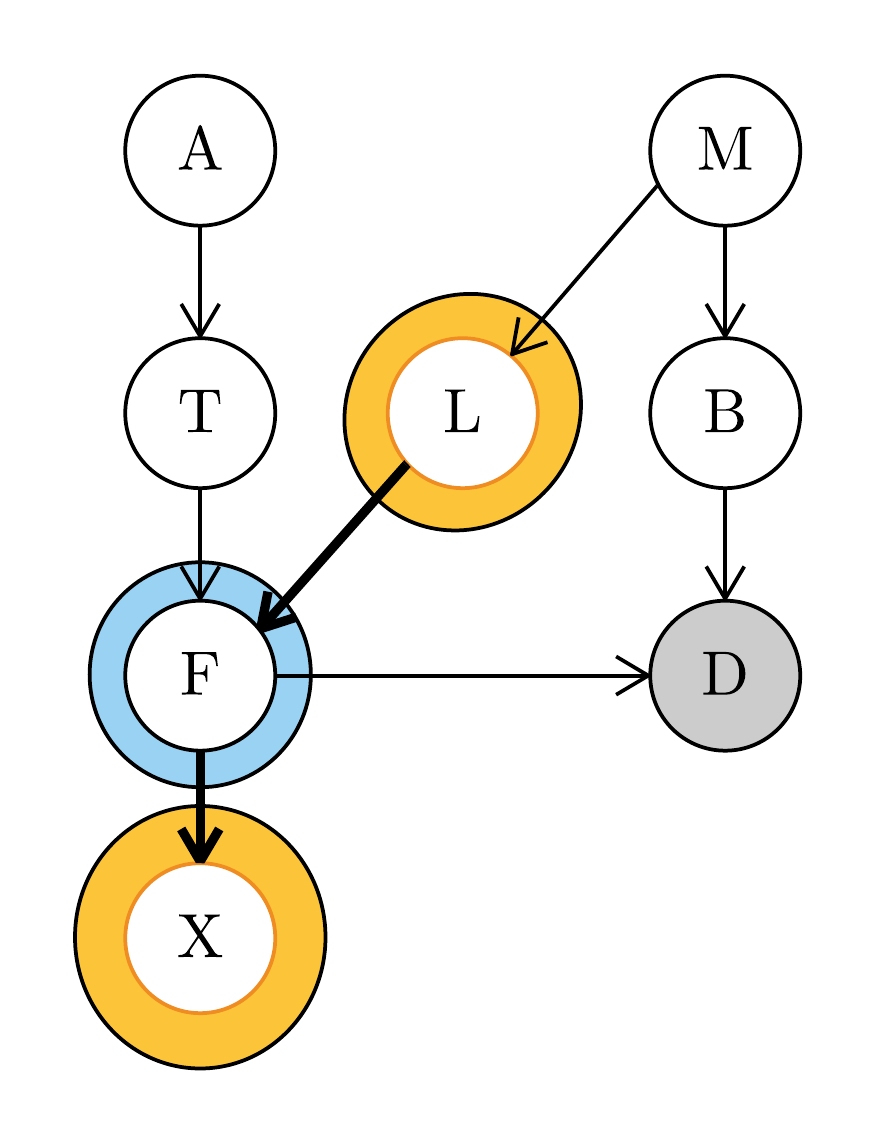

In [89]:
Image("Q18_4_e.png", width=240)

## Programming Homework 3

In this exercise we model a string of text using a Markov(1) model. For simplicity we only consider letters 'a-z'. Capital letters 'A-Z' are mapped to the corresponding ones. All remaining letters, symbols, numbers, including spaces, are denoted by '.'.


We have a probability table $T$ where $T_{i,j} = p(x_t = j | x_{t-1} = i)$  transition model of letters in English text for $t=1,2 \dots N$. Assume that the initial letter in a string is always a space denoted as $x_0 = \text{'.'}$. Such a model where the probability table is always the same is sometimes called a stationary model.

1. For a given $N$, write a program to sample random strings with letters $x_1, x_2, \dots, x_N$ from $p(x_{1:N}|x_0)$
1. Now suppose you are given strings with missing letters, where each missing letter is denoted by a question mark (or underscore, as below). Implement a method, that samples missing letters conditioned on observed ones, i.e., samples from $p(x_{-\alpha}|x_{\alpha})$ where $\alpha$ denotes indices of observed letters. For example, if the input is 't??.', we have $N=4$ and
$x_1 = \text{'t'}$ and $x_4 = \text{'.'}$, $\alpha=\{1,4\}$ and $-\alpha=\{2,3\}$. Your program may possibly generate the strings 'the.', 'twi.', 'tee.', etc. Hint: make sure to make use all data given and sample from the correct distribution. Implement the method and print the results for the test strings below. 
1. Describe a method for filling in the gaps by estimating the most likely letter for each position. Hint: you need to compute
$$
x_{-\alpha}^* = \arg\max_{x_{-\alpha}} p(x_{-\alpha}|x_{\alpha})
$$
Implement the method and print the results for the following test strings along with the log-probability  $\log p(x_{-\alpha}^*,x_{\alpha})$.
1. Discuss how you can improve the model to get better estimations.

In [90]:
test_strings = ['th__br__n.f_x.', '_u_st__n_.to_be._nsw_r__','i__at_._a_h_n_._e_r_i_g','q___t.___z._____t.__.___.__.']

Hint: The code below loads a table of transition probabilities for English text.

In [91]:
import csv # 27x27 table, stationary since x0 is fixed to be '.'
import numpy as np
from itertools import product # for cartesian product
import operator # for max index


from IPython.display import display, Latex

alphabet = [chr(i+ord('a')) for i in range(26)]
alphabet.append('.')
letter2idx = {c:i for i,c in enumerate(alphabet)}

T = []
with open('transitions.csv') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        T.append(row) # add probabilities to T row by row

print('Example')
## p(x_t = 'u' | x_{t-1} = 'q')
display(Latex(r"$p(x_t = \text{'u'} | x_{t-1} = \text{'q'})$"))
print(T[letter2idx['q']][letter2idx['u']])
display(Latex(r"$p(x_t | x_{t-1} = \text{'a'})$"))
for c,p in zip(alphabet,T[letter2idx['a']]):
    print(c,p)
    
print("\n")
print("Part 1 (for length=10)")

# algorithm for weighted choice
def weighted_choice(weights):
    totals = []
    running_total = 0

    for w in weights:
        running_total += w
        totals.append(running_total)

    rnd = np.random.random() * running_total
    for i, total in enumerate(totals):
        if rnd < total:
            return i

N = 10 # word length
x0 = '.' # x0 is space
randomWord= x0 
for i in range(N):
    #print("current letter: ", randomWord[i])
    p = T[letter2idx[randomWord[i]]] # get the probability of next letter given the current letter
    p = [float(e) for e in p] # convert p into a list of floats from chars
    #print(p)
    #print(sum(p))
    randomWord+=(alphabet[weighted_choice(p)]) # get a letter with weighted probability and append it to the word
                      
print(randomWord)
print("\n")

print("Parts 2-3 (first line for each word is for part 2 and the second is for part 3)")

def complete_word(incomplete_word):
    #print(incomplete_word)
    completed_word_random=incomplete_word # will be completed acc to prob distr (part 2)
    completed_word_max=incomplete_word # will be completed with letters with max. probability (part 3)
    maxlogprob=0

    N = len(incomplete_word)
    a = []
    a_not = []
    for i in range(N):
        if incomplete_word[i]=='_' or incomplete_word[i]=='?':
            a_not.append(i+1)
        else: 
            a.append(i+1)
    #print(a)
    #print(a_not)
    
    
    missingchunks = [] 
    prev = a_not[0]-1
    missingchunk=[] # indicates the indices of a missing chunk
    for i in a_not:
        if (i==prev+1):
            missingchunk.append(i)
        else: 
            missingchunks.append(missingchunk)
            missingchunk=[i]
        if(i==a_not[len(a_not)-1]):
                 missingchunks.append(missingchunk)
        prev=i
        
    #print(missingchunks)
    
    # Think of this as factorization. A chunk consists of <b>_______<e>, 
    # where b is the given beginning letter and e is the given ending letter of the chunk.
    # The letters in the next missing chunk do not depend on anything before its own <b>.
    
    # Markov(1) -> Given the present observation <b>, the future is independent from the past
    
    for mc in missingchunks: # for each missing chunk, fill in the blanks
        #print("In chunk: ", mc)
        begin_index= mc[0]-1        
        end_index= mc[len(mc)-1]+1
        

        all_combinations= product(alphabet,repeat=len(mc)) # e.g. for mc: a _ _ _ d , [(a,a,a),(a,a,b),...]
        joint_probability_table=[]
        
        begin = '.'
        end='-1'
        
        if begin_index!=0:
            begin = incomplete_word[begin_index-1]
        
        if(end_index < len(incomplete_word)-1):
            end = incomplete_word[end_index-1]     
        #print("begin: ", begin)
        #print("end: ", end)
            
        for candidate in all_combinations:
            #print(candidate)
            
            prob = float(T[letter2idx[begin]][letter2idx[candidate[0]]])
            if prob==0: # to avoid division by zero in log
                prob=10**-10
            logprob = np.log(prob) # convert all to log to avoid getting zero probabilities due to precision issues
            
            for i in range(len(candidate)-2):
                p = float(T[letter2idx[candidate[i]]][letter2idx[candidate[i+1]]])
                if p==0:
                    p=10**-10             
                logprob += np.log(p) 
                
            if end!='-1':
                prob = float(T[letter2idx[candidate[len(candidate)-1]]][letter2idx[end]])   
                if prob==0:
                    prob=10**-10
                logprob += np.log(prob) 
                
            joint_probability_table.append(10**logprob) # joint prob distr for the chunk, converted back to decimal
        
        #print(joint_probability_table)

        # fill in the blanks
        
        # using weighted random sampling
        ind = weighted_choice(joint_probability_table)
        
        ##############
        # instead of a weighted random sampling, we take the sequence that has the maximum likelihood.
        ##############
        maxind, value = max(enumerate(joint_probability_table), key=operator.itemgetter(1))
        maxlogprob+=np.log(value) #maxlogprob is the addition of logprobs of each chunk as the chunks are independent of each other
        
        currentind=0
        #print ("ind: ",ind)
        #print ("maxind: ",maxind)

        all_combinations= product(alphabet,repeat=len(mc)) # e.g. for mc: a _ _ _ d , [(a,a,a),(a,a,b),...]
        for candidate in all_combinations:
            #print("currentind: ",currentind)
            if currentind==ind:
                #print("winner is: ", candidate)
                sequence=''.join(candidate)
                completed_word_random= completed_word_random[0:begin_index]+sequence+completed_word_random[end_index-1:]
                #print(incomplete_word)
                #print(completed_word_random)
            if currentind==maxind:
                #print("max is: ", candidate)
                maxsequence=''.join(candidate)
                completed_word_max= completed_word_max[0:begin_index]+maxsequence+completed_word_max[end_index-1:]
            currentind=currentind+1

                
    print("part2-choice: ", completed_word_random)
    print("part3-max_likelihood: ", completed_word_max)
    print("part3-log probability: ", maxlogprob)
    print("\n")


    
for s in test_strings:
    complete_word(s)

print("Here's something extra. This is what my algorithm thinks the homework title should be:")
complete_word(str.lower("Pr?gr?mm?ng?H?m?w?rk.3"))




Example


<IPython.core.display.Latex object>

0.9949749


<IPython.core.display.Latex object>

a 0.0002835
b 0.0228302
c 0.0369041
d 0.0426290
e 0.0012216
f 0.0075739
g 0.0171385
h 0.0014659
i 0.0372661
j 0.0002353
k 0.0110124
l 0.0778259
m 0.0260757
n 0.2145354
o 0.0005459
p 0.0195213
q 0.0001749
r 0.1104770
s 0.0934290
t 0.1317960
u 0.0098029
v 0.0306574
w 0.0088799
x 0.0009562
y 0.0233701
z 0.0018701
. 0.0715219


Part 1 (for length=10)
.thins.rth.


Parts 2-3 (first line for each word is for part 2 and the second is for part 3)
part2-choice:  thembr.in.frx.
part3-max_likelihood:  the.brein.f.x.
part3-log probability:  -17.6534719919


part2-choice:  oursthant.to.be.answar.u
part3-max_likelihood:  oursthind.to.be.answerea
part3-log probability:  -65.7689168141


part2-choice:  inzath.hathind.herr.isg
part3-max_likelihood:  inzath.wathend.he.r.ing
part3-log probability:  -75.0110153302


part2-choice:  qusxt.t.zz.ten.it.of..tg.tg.
part3-max_likelihood:  qurxt.thzz.the.xt.ty.thy.ta.
part3-log probability:  -54.5131397343


Here's something extra. This is what my algorithm think

#### Part 4
The question could be solved using the sum-product algorithm, which works for much more general cases than Markov(1) type graphs. In fact, using a deeper level Markov model would give better results in predicting the missing letters. A given letter might influence two, three, or even all of the future letters rather than just one.